In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_linnerud
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv("/content/data_landmarks_21point_angles_img_name")
# df = pd.read_csv("/content/data68point")
bins_labels= pd.read_csv("/content/datafile.csv")


In [ ]:
!unzip /content/drive/MyDrive/AFLW2000-3D.zip

Archive:  /content/drive/MyDrive/AFLW2000-3D.zip
replace AFLW2000/Code/DrawSolidHead.m? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,yaw,pitch,roll,img
0,141.506329,207.962025,160.493671,207.962025,181.379747,206.063291,240.240506,192.772152,268.721519,175.683544,...,232.645570,314.291139,274.417722,297.202532,251.632911,365.556962,1.044306,-22.874239,4.908886,image00002
1,214.503650,152.094891,227.642336,168.518248,247.350365,198.080292,286.766423,230.927007,316.328467,234.211679,...,191.510949,306.474453,217.788321,322.897810,161.948905,349.175182,68.155240,26.932743,17.243670,image00004
2,-1.000000,452.000000,-1.000000,452.000000,-1.000000,452.000000,219.627451,211.784314,231.392157,206.882353,...,207.862745,297.078431,227.470588,301.000000,217.666667,348.058824,50.485413,-10.579652,-13.570645,image00006
3,178.508651,159.823529,204.979239,153.595156,240.792388,178.508651,254.806228,197.193772,-1.000000,452.000000,...,240.792388,301.519031,-1.000000,452.000000,217.435986,376.259516,17.143373,-10.048455,-21.392782,image00008
4,194.589744,203.564103,218.948718,201.000000,247.153846,211.256410,258.692308,218.948718,-1.000000,452.000000,...,235.615385,307.410256,-1.000000,452.000000,203.564103,354.846154,68.640550,-50.544582,-59.207973,image00010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.000000,452.000000,-1.000000,452.000000,-1.000000,452.000000,201.112867,200.097065,207.207675,188.923251,...,209.239278,304.724605,220.413093,306.756208,-1.000000,452.000000,-4.035367,-11.293093,6.022806,image04358
1996,144.416416,184.050261,171.128380,177.643293,196.882353,175.705882,265.060759,190.029974,286.882353,175.705882,...,212.764706,302.764706,262.936762,312.030906,218.058824,366.294118,-81.288440,-13.327947,10.081747,image04363
1997,-1.000000,452.000000,-1.000000,452.000000,-1.000000,452.000000,208.520661,214.471074,233.066116,207.033058,...,223.396694,311.165289,241.247934,316.371901,240.504132,352.074380,82.005560,-82.961685,-86.483290,image04364
1998,156.373134,193.537313,192.641791,193.089552,218.611940,210.104478,257.119403,211.447761,281.298507,205.179104,...,221.298507,311.298507,243.686567,310.402985,215.925373,348.910448,-68.249340,-24.090857,25.869925,image04365


In [ ]:
from google.colab.patches import cv2_imshow
import cv2


In [ ]:
# df.iloc[0,:]

In [ ]:
import numpy as np
import os
import scipy.io as sio
import cv2
import math
from math import cos, sin
import dlib
import glob
from pathlib import Path
import pandas as pd
from PIL import Image, ImageFilter

In [ ]:
import scipy.io
mat = scipy.io.loadmat('/content/AFLW2000/image00002.mat')
pt3d=mat['pt3d_68']
pt2d=mat['pt2d']



In [ ]:
mylist = [Path(f).stem for f in glob.glob("/content/AFLW2000/*.mat")]


In [ ]:
# mylist

In [ ]:
data_for_all_images=[]
name_for_all_images=[]
for img in mylist:
  data_of_current_img=[]
  image = os.path.join('/content/AFLW2000/',img+'.mat')
 
  frame = cv2.imread(image)
  mat = scipy.io.loadmat(image)
  pt3d=mat['pt3d_68']
  pt2d=mat['pt2d']
  a,b=pt3d.shape[0],pt3d.shape[1]
  data_of_current_img=[]
  for j in range(b):
      data_of_current_img.append(pt3d[0][j])
      data_of_current_img.append(pt3d[1][j])
  name_for_all_images.append(img+'.jpg')
  data_for_all_images.append(data_of_current_img)
  # break



In [ ]:
name_for_all_images[90]

'image01645.jpg'

In [ ]:
image = os.path.join('/content/AFLW2000/','image01645'+'.mat')

frame = cv2.imread(image)
mat = scipy.io.loadmat(image)
pt3d=mat['pt3d_68']
pt2d=mat['pt2d']

In [ ]:
# pt3d

In [ ]:
# data_for_all_images[90]

In [ ]:
len(name_for_all_images)

2000

In [ ]:
data_arra=np.array(data_for_all_images,dtype=np.float32)

In [ ]:
df = pd.DataFrame(data_arra) #convert to a dataframe

In [ ]:
df['img']=name_for_all_images

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,img
0,125.997551,234.930573,131.920059,258.937469,140.949829,280.292297,148.610504,300.509583,159.595306,323.317841,...,315.074829,269.766937,306.050323,250.088684,318.334686,238.204102,321.377991,225.296326,321.026031,image02871.jpg
1,105.818855,258.772858,111.762283,283.177429,117.854721,305.717041,126.760139,324.329102,142.856323,343.643005,...,310.300507,244.057541,315.655609,250.653351,315.627899,248.976273,315.957306,246.794174,315.419220,image02249.jpg
2,284.683655,233.601013,284.700653,257.534607,286.197876,280.265015,283.814240,299.148285,274.616486,318.005798,...,306.739685,231.831055,308.779846,213.424515,305.594116,210.096527,305.402832,208.610718,304.701691,image02420.jpg
3,123.222382,202.809433,119.753166,232.927765,119.697655,261.539124,119.370834,285.460968,123.200867,310.707245,...,309.659546,256.765686,316.081482,231.017838,326.933868,217.313202,326.386169,203.574234,320.896179,image03827.jpg
4,141.127747,173.398254,134.669891,201.213577,132.062790,227.405579,130.712479,250.212036,131.577484,275.382690,...,312.195984,243.334290,321.402557,218.858444,319.733826,206.503265,315.426361,194.036194,308.636078,image03740.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,186.267944,294.676758,194.747589,313.036285,204.611649,329.923889,214.010010,342.563019,221.383057,352.182892,...,281.607697,251.150330,283.470215,233.366119,295.984558,227.116302,300.814514,221.436005,303.784119,image00787.jpg
1996,104.128799,237.494064,108.407990,260.181519,113.991539,281.196777,120.195137,299.919800,131.767670,319.743744,...,296.601562,251.133652,300.845581,248.627808,308.768250,243.715866,310.621399,236.038193,310.728882,image01155.jpg
1997,198.558899,215.300140,196.097076,241.457901,196.858673,266.173065,195.664398,287.891174,192.927826,311.673767,...,310.291443,259.048859,318.491608,225.025269,328.105377,213.176361,326.838074,203.882385,322.221130,image03813.jpg
1998,115.593826,198.556229,116.081421,229.545593,120.134163,258.510742,124.620201,283.908752,131.276596,311.764191,...,312.367004,258.429962,312.831665,231.838776,314.849762,220.545227,314.506256,208.935654,312.235168,image00065.jpg


In [ ]:
data_arra.shape

(2000, 136)

In [ ]:
img=data_arra[0]
img

array([125.99755, 234.93057, 131.92006, 258.93747, 140.94983, 280.2923 ,
       148.6105 , 300.50958, 159.5953 , 323.31784, 176.97568, 342.48807,
       194.66196, 356.7301 , 215.54031, 370.19513, 244.45105, 373.60126,
       270.6541 , 362.45166, 284.92487, 344.3993 , 294.6217 , 325.34897,
       303.38025, 302.22644, 306.30313, 277.46854, 306.8946 , 255.7787 ,
       307.85208, 232.01845, 305.92267, 206.78833, 148.4469 , 206.63641,
       156.0141 , 195.25287, 168.11194, 194.15543, 182.26163, 197.19485,
       194.62375, 200.1867 , 244.77371, 194.8854 , 255.13074, 189.3805 ,
       266.79358, 184.28531, 278.4257 , 182.47598, 287.59583, 188.39133,
       225.36856, 226.152  , 228.89388, 245.25206, 232.45221, 264.71997,
       234.6369 , 279.71814, 217.1943 , 289.77588, 224.80571, 290.78635,
       234.69826, 291.02255, 243.8693 , 288.1016 , 250.04956, 285.08234,
       168.7893 , 229.28513, 176.28476, 222.40326, 187.76953, 219.6706 ,
       198.4508 , 226.04831, 190.05585, 231.10286, 

In [ ]:
data_for_all_images[90]

[161.12343,
 228.02768,
 160.47842,
 254.21075,
 162.06842,
 278.09955,
 162.49635,
 299.58307,
 162.07446,
 323.81216,
 164.58176,
 341.87695,
 169.46832,
 352.33405,
 177.71613,
 363.95642,
 203.92334,
 373.00763,
 239.52591,
 367.9944,
 268.74722,
 358.96408,
 292.5071,
 350.6904,
 313.10638,
 335.96033,
 323.86365,
 313.1326,
 332.32617,
 292.68427,
 340.32736,
 269.1023,
 346.6909,
 242.8821,
 158.65169,
 200.14215,
 164.76016,
 194.14066,
 175.54015,
 191.81775,
 186.6405,
 193.65326,
 197.22713,
 198.26976,
 245.88683,
 197.26486,
 259.3029,
 194.25586,
 274.91925,
 193.30426,
 291.63147,
 197.69464,
 305.63345,
 207.9039,
 216.95586,
 218.72833,
 211.95644,
 232.23917,
 206.42812,
 245.71239,
 204.14465,
 258.36356,
 195.89722,
 269.70758,
 201.25049,
 271.45255,
 209.96558,
 274.3042,
 221.04802,
 272.7976,
 230.73508,
 271.87656,
 172.195,
 217.60776,
 177.96034,
 212.59174,
 189.16629,
 213.40692,
 200.52368,
 220.15718,
 189.48291,
 221.93901,
 178.10818,
 221.988,
 250.233

In [ ]:
print(int(data_for_all_images[90][2]),int(data_for_all_images[90][3]))


160 254


In [ ]:
image = os.path.join('/content/AFLW2000/',df['img'][0])
image

'/content/AFLW2000/image02871.jpg'

In [ ]:
arr=df.iloc[0,0:-1]
arr

0      125.997551
1      234.930573
2      131.920059
3      258.937469
4      140.949829
          ...    
131    318.334686
132    238.204102
133    321.377991
134    225.296326
135    321.026031
Name: 0, Length: 136, dtype: object

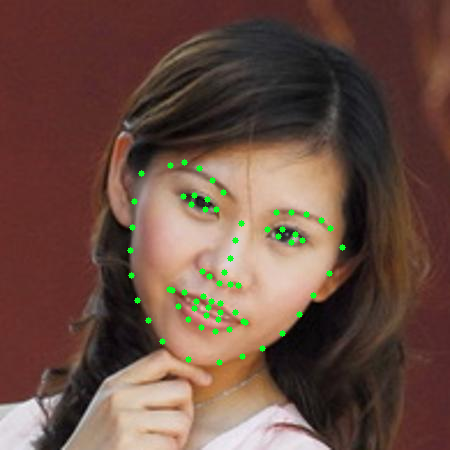

In [ ]:
image = os.path.join('/content/AFLW2000/',df['img'][4])
frame = cv2.imread(image)

arr=df.iloc[4,0:-1]
arr=np.array(arr)
for j in range(0,136,2):

    # print(int(arr[90][j]),int(arr[90][j+1]))
    cv2.circle(frame, (int(arr[j]),int(arr[j+1])), radius=0, color=(36,255,12), thickness=5)
    # j=j+1
    # print(j,j+1)
    
cv2.destroyAllWindows()
cv2_imshow(frame)


In [ ]:
image='/content/AFLW2000/image01645.jpg'
frame = cv2.imread(image)



# frame = cv2.imread()
mat = scipy.io.loadmat('/content/AFLW2000/image01645.mat')
pt3d=mat['pt3d_68']
pt2d=mat['pt2d']
a,b=pt3d.shape[0],pt3d.shape[1]
for j in range(68):
    print(pt3d[0][j],pt3d[1][j])
    # cv2.circle(frame, (int(pt3d[0][j]),int(pt3d[1][j])), radius=0, color=(36,255,12), thickness=5)
    # j+=1
                

# cv2_imshow(draw_axis(frame,8.093195,-17.030193 ,-2.3413932,tdx,tdy)
#             )
# cv2.destroyAllWindows()
# cv2_imshow(frame)


In [ ]:
DDDF=pd.read_csv('/content/angle_data.csv')

In [ ]:
DDDF['img']=DDDF['img_name']
# DDDF.drop()

In [ ]:
DDDF.drop(['Unnamed: 0','img_name'],axis=1,inplace=True)

In [ ]:
DDDF

,pitch,yaw,roll,img
0,-22.874239,1.044306,4.908885,image00002.jpg
1,26.932741,68.155235,17.243670,image00004.jpg
2,-10.579652,50.485413,-13.570644,image00006.jpg
3,-10.048456,17.143373,-21.392782,image00008.jpg
4,-50.544579,68.640549,-59.207973,image00010.jpg
...,...,...,...,...
1995,-11.293093,-4.035367,6.022806,image04358.jpg
1996,-13.327947,-81.288437,10.081746,image04363.jpg
1997,-82.961678,82.005554,-86.483292,image04364.jpg
1998,-24.090855,-68.249336,25.869925,image04365.jpg


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,img
0,125.997551,234.930573,131.920059,258.937469,140.949829,280.292297,148.610504,300.509583,159.595306,323.317841,...,315.074829,269.766937,306.050323,250.088684,318.334686,238.204102,321.377991,225.296326,321.026031,image02871.jpg
1,105.818855,258.772858,111.762283,283.177429,117.854721,305.717041,126.760139,324.329102,142.856323,343.643005,...,310.300507,244.057541,315.655609,250.653351,315.627899,248.976273,315.957306,246.794174,315.419220,image02249.jpg
2,284.683655,233.601013,284.700653,257.534607,286.197876,280.265015,283.814240,299.148285,274.616486,318.005798,...,306.739685,231.831055,308.779846,213.424515,305.594116,210.096527,305.402832,208.610718,304.701691,image02420.jpg
3,123.222382,202.809433,119.753166,232.927765,119.697655,261.539124,119.370834,285.460968,123.200867,310.707245,...,309.659546,256.765686,316.081482,231.017838,326.933868,217.313202,326.386169,203.574234,320.896179,image03827.jpg
4,141.127747,173.398254,134.669891,201.213577,132.062790,227.405579,130.712479,250.212036,131.577484,275.382690,...,312.195984,243.334290,321.402557,218.858444,319.733826,206.503265,315.426361,194.036194,308.636078,image03740.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,186.267944,294.676758,194.747589,313.036285,204.611649,329.923889,214.010010,342.563019,221.383057,352.182892,...,281.607697,251.150330,283.470215,233.366119,295.984558,227.116302,300.814514,221.436005,303.784119,image00787.jpg
1996,104.128799,237.494064,108.407990,260.181519,113.991539,281.196777,120.195137,299.919800,131.767670,319.743744,...,296.601562,251.133652,300.845581,248.627808,308.768250,243.715866,310.621399,236.038193,310.728882,image01155.jpg
1997,198.558899,215.300140,196.097076,241.457901,196.858673,266.173065,195.664398,287.891174,192.927826,311.673767,...,310.291443,259.048859,318.491608,225.025269,328.105377,213.176361,326.838074,203.882385,322.221130,image03813.jpg
1998,115.593826,198.556229,116.081421,229.545593,120.134163,258.510742,124.620201,283.908752,131.276596,311.764191,...,312.367004,258.429962,312.831665,231.838776,314.849762,220.545227,314.506256,208.935654,312.235168,image00065.jpg


In [ ]:
def draw_axis(img, yaw, pitch, roll, tdx=None, tdy=None, size = 100):

    pitch = pitch * np.pi / 180
    yaw = -(yaw * np.pi / 180)
    roll = roll * np.pi / 180

    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

In [ ]:
rslt=pd.merge(df, DDDF, how="inner", on=["img"])
# pd.concat([df, DDDF], on='', join="inner",axis=1)

In [ ]:
rslt

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,img,pitch,yaw,roll
0,125.997551,234.930573,131.920059,258.937469,140.949829,280.292297,148.610504,300.509583,159.595306,323.317841,...,250.088684,318.334686,238.204102,321.377991,225.296326,321.026031,image02871.jpg,-9.830399,-5.311411,-8.000629
1,105.818855,258.772858,111.762283,283.177429,117.854721,305.717041,126.760139,324.329102,142.856323,343.643005,...,250.653351,315.627899,248.976273,315.957306,246.794174,315.419220,image02249.jpg,18.787455,-72.501770,-23.285622
2,284.683655,233.601013,284.700653,257.534607,286.197876,280.265015,283.814240,299.148285,274.616486,318.005798,...,213.424515,305.594116,210.096527,305.402832,208.610718,304.701691,image02420.jpg,-10.324140,70.898911,-8.707196
3,123.222382,202.809433,119.753166,232.927765,119.697655,261.539124,119.370834,285.460968,123.200867,310.707245,...,231.017838,326.933868,217.313202,326.386169,203.574234,320.896179,image03827.jpg,-5.176270,-2.797694,12.828069
4,141.127747,173.398254,134.669891,201.213577,132.062790,227.405579,130.712479,250.212036,131.577484,275.382690,...,218.858444,319.733826,206.503265,315.426361,194.036194,308.636078,image03740.jpg,-11.026465,2.229434,20.764729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,186.267944,294.676758,194.747589,313.036285,204.611649,329.923889,214.010010,342.563019,221.383057,352.182892,...,233.366119,295.984558,227.116302,300.814514,221.436005,303.784119,image00787.jpg,8.964172,29.606840,-24.391029
1996,104.128799,237.494064,108.407990,260.181519,113.991539,281.196777,120.195137,299.919800,131.767670,319.743744,...,248.627808,308.768250,243.715866,310.621399,236.038193,310.728882,image01155.jpg,-4.350514,-36.474377,-1.804499
1997,198.558899,215.300140,196.097076,241.457901,196.858673,266.173065,195.664398,287.891174,192.927826,311.673767,...,225.025269,328.105377,213.176361,326.838074,203.882385,322.221130,image03813.jpg,-2.802148,28.748041,9.137387
1998,115.593826,198.556229,116.081421,229.545593,120.134163,258.510742,124.620201,283.908752,131.276596,311.764191,...,231.838776,314.849762,220.545227,314.506256,208.935654,312.235168,image00065.jpg,-7.908564,0.132777,5.191370


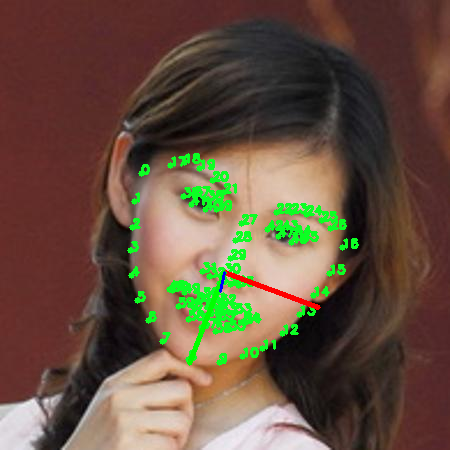

In [ ]:
image = os.path.join('/content/AFLW2000/',rslt['img'][4])
frame = cv2.imread(image)

arr=rslt.iloc[4,0:-1]
arr=np.array(arr)
i=0
for j in range(0,136,2):

    # print(int(arr[90][j]),int(arr[90][j+1]))
    cv2.circle(frame, (int(arr[j]),int(arr[j+1])), radius=0, color=(36,255,12), thickness=5)
    cv2.putText(frame, str(i),(int(arr[j]),int(arr[j+1])), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (36,255,12), 2)
    i=i+1
    # print(j,j+1)
cv2_imshow(draw_axis(frame,	2.229434,-11.026465,20.764729,rslt.iloc[4,60],rslt.iloc[4,61]))
cv2.destroyAllWindows()


In [ ]:
rslt.to_csv('data_ready_iSA.csv',index=False)

In [ ]:
hi=pd.read_csv('/content/data_ready_iSA.csv')

In [ ]:
hi

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,img,pitch,yaw,roll
0,125.997550,234.93057,131.92006,258.93747,140.949830,280.29230,148.610500,300.50958,159.59530,323.31784,...,250.08868,318.33470,238.20410,321.37800,225.29633,321.02603,image02871.jpg,-9.830399,-5.311411,-8.000629
1,105.818855,258.77286,111.76228,283.17743,117.854720,305.71704,126.760140,324.32910,142.85632,343.64300,...,250.65335,315.62790,248.97627,315.95730,246.79417,315.41922,image02249.jpg,18.787455,-72.501770,-23.285622
2,284.683650,233.60101,284.70065,257.53460,286.197880,280.26500,283.814240,299.14830,274.61650,318.00580,...,213.42451,305.59412,210.09653,305.40283,208.61072,304.70170,image02420.jpg,-10.324140,70.898911,-8.707196
3,123.222380,202.80943,119.75317,232.92776,119.697655,261.53912,119.370834,285.46097,123.20087,310.70724,...,231.01784,326.93387,217.31320,326.38617,203.57423,320.89618,image03827.jpg,-5.176270,-2.797694,12.828069
4,141.127750,173.39825,134.66989,201.21358,132.062790,227.40558,130.712480,250.21204,131.57748,275.38270,...,218.85844,319.73383,206.50327,315.42636,194.03620,308.63608,image03740.jpg,-11.026465,2.229434,20.764729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,186.267940,294.67676,194.74759,313.03630,204.611650,329.92390,214.010010,342.56302,221.38306,352.18290,...,233.36612,295.98456,227.11630,300.81450,221.43600,303.78412,image00787.jpg,8.964172,29.606840,-24.391029
1996,104.128800,237.49406,108.40799,260.18152,113.991540,281.19678,120.195140,299.91980,131.76767,319.74374,...,248.62780,308.76825,243.71587,310.62140,236.03820,310.72888,image01155.jpg,-4.350514,-36.474377,-1.804499
1997,198.558900,215.30014,196.09708,241.45790,196.858670,266.17307,195.664400,287.89117,192.92783,311.67377,...,225.02527,328.10538,213.17636,326.83807,203.88239,322.22113,image03813.jpg,-2.802148,28.748041,9.137387
1998,115.593830,198.55623,116.08142,229.54560,120.134160,258.51074,124.620200,283.90875,131.27660,311.76420,...,231.83878,314.84976,220.54523,314.50626,208.93565,312.23517,image00065.jpg,-7.908564,0.132777,5.191370
